# Regressions for Quality Filter Analysis

In [86]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sns.set(context='paper', style='white', font_scale=1.3)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Model

In [2]:
from lr.eval import load_model
clf, clf_vectorizer = load_model("../logistic_regression/new_model/")

## Load and Featurize Data

In [ ]:
from data.loader import load_data, get_high_schools, compute_stats
from data.featurize import featurize, preprocess

In [3]:
df = load_data()

  0%|          | 0/1059005 [00:00<?, ?it/s]

In [5]:
high_schools = get_high_schools(df)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 935428/935428 [00:01<00:00, 560136.98it/s]


In [9]:
stats = compute_stats(high_schools)
stats

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

,county:state,school:county:state,state,text,zipcode:county:state
high,552,1410,51,910431,1329


In [68]:
features = featurize(high_schools)

initializing features...
merging zipcode features...
loading school data...
merging school data...


  0%|          | 0/1410 [00:00<?, ?it/s]

loading and merging county data...


In [71]:
features.shape

(1410, 143)

## Document Feature Exploration

In [115]:
from data.loader import load_and_score
from data.constants import DATA_DIR
from data.cluster import cluster_text
from data.viz import build_school_category_plot

In [110]:
high_news = load_and_score(path=DATA_DIR / "articles-high-reliability-clean.jsonl")
low_news = load_and_score(path=DATA_DIR / "articles-low-reliability-clean.jsonl")

  0%|          | 0/9939 [00:00<?, ?it/s]

  0%|          | 0/9939 [00:00<?, ?it/s]

  0%|          | 0/7662 [00:00<?, ?it/s]

  0%|          | 0/7662 [00:00<?, ?it/s]

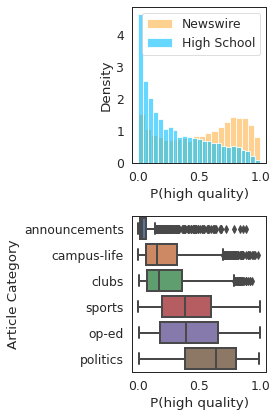

In [116]:
build_school_category_plot(high_schools, high_news)

In [129]:
# sample 10K opinion articles
opeds = high_schools.loc[high_schools.category.apply(lambda x: "opinion" in x)].sample(10000).copy().reset_index()


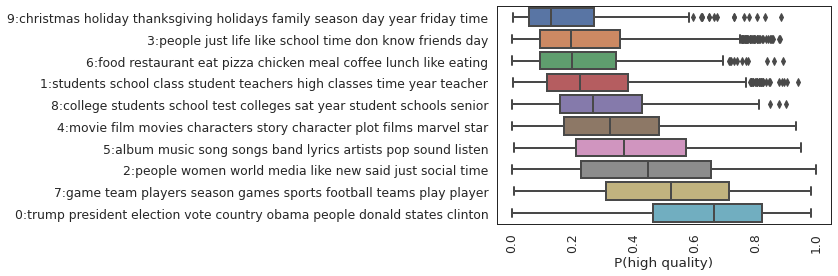

In [130]:
# cluster text via prob high quality
opeds = cluster_text(opeds, num_clusters=10, num_words=10, plot_boxplot=True)

## Document Regression

In [131]:
from data.featurize import text_featurize

In [132]:
text_features = text_featurize(opeds)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [133]:
formula = "prob_high_quality~ 1 + num_tokens + first_person + third_person + topic" 
model = smf.ols(formula=formula, data=text_features).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      prob_high_quality   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     382.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:43:11   Log-Likelihood:                 1635.2
No. Observations:               10000   AIC:                            -3244.
Df Residuals:                    9987   BIC:                            -3151.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5989      0.008     74.288   

## Demographic Feature Exploration

In [ ]:
from data.viz import build_correlation_plots

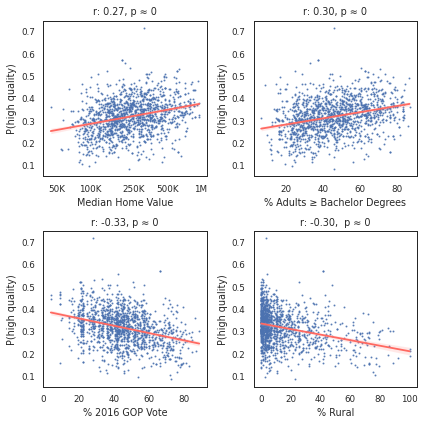

In [90]:
features_ = preprocess(features, REGRESSION_FEATURES, impute_only=True)
build_correlation_plots(features_, save=False)

## Demographic Regressions

In [ ]:
import statsmodels.formula.api as smf
from data.constants import REGRESSION_FEATURES


In [91]:
features_ = preprocess(features, REGRESSION_FEATURES)
features_.shape

(1379, 146)

In [146]:
formula = """
        prob_high_quality ~ 
        1 +
        mixed_ratio +
        pacific_islander_ratio + 
        hispanic_ratio +
        asian_ratio +
        black_ratio +
        native_ratio +
        pupil_ratio +
        school_size + 
        city + 
        rural + 
        suburb + 
        is_charter + 
        is_magnet  + 
        num_degree_holders + 
        median_home_value
        """

model = smf.ols(formula=formula, data=features_).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      prob_high_quality   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     14.90
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           5.03e-36
Time:                        21:47:15   Log-Likelihood:                 1677.0
No. Observations:                1379   AIC:                            -3322.
Df Residuals:                    1363   BIC:                            -3238.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [93]:
formula = """
        prob_high_quality ~ 
        1 +
        mixed_ratio +
        pacific_islander_ratio + 
        hispanic_ratio +
        asian_ratio +
        black_ratio +
        native_ratio +
        pupil_ratio +
        school_size + 
        city + 
        rural + 
        suburb + 
        is_charter + 
        is_magnet  + 
        num_degree_holders + 
        median_home_value + 
        rep_share_2016
        """

model = smf.ols(formula=formula, data=features_).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      prob_high_quality   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     17.36
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           7.70e-45
Time:                        20:40:13   Log-Likelihood:                 1700.2
No. Observations:                1379   AIC:                            -3366.
Df Residuals:                    1362   BIC:                            -3278.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

## TOEFL Exam Regression

In [136]:
toefl_exams = load_and_score(DATA_DIR / 'toefl.jsonl')

  0%|          | 0/12100 [00:00<?, ?it/s]

  0%|          | 0/12100 [00:00<?, ?it/s]

In [137]:
model = "C(score_level, Treatment(reference='medium')) + prompt"
formula = "prob_high_quality~ 1 + " + model
#formula = "log_prob_high_quality ~ 1  +  pop_urban + fte_teacher + dem_share  + proportion_white + pupil_ratio + income + asian  + mixed   + black"
model = smf.ols(formula=formula, data=toefl_exams).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      prob_high_quality   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     3315.
Date:                Wed, 12 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:45:12   Log-Likelihood:                 6650.6
No. Observations:               12100   AIC:                        -1.328e+04
Df Residuals:                   12090   BIC:                        -1.321e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------